# **AP157 Image Processing Lab Assignment**
### Module B2: Fourier Transform Applications in Image Processing

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: Clemente, Lance\
_Student No._: 2021-07811\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: April 18, 2024 11:25 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Lance Clemente**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/20
* Part 3 - []/20
* Part 4 - []/30

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm
from numpy.fft import fft2,ifft2,fftshift,ifftshift
import random
import cv2
from skimage import data, color, io

#### PART 1 - Apply 2D FFT on simple apertures *(30 points)*

1. [15 pts.] Rectangular apertures with (width, height):
- (50, 20) pixels
- (20, 50) pixels
2. [15 pts.] Circular apertures with radii:
- 5 pixels
- 10 pixels
- 20 pixels

For each aperture type, perform the following steps:

- **Step 1: Define Input Aperture**
  - Generate a 2D array representing a rectangle/circle with the specified size within a square grid of size 128 pixels (representing an optical system, for example).
  
- **Step 2: Compute Fourier Transform**
  - Use the Fast Fourier Transform (FFT) algorithm to compute the Fourier transform of the input aperture.

- **Step 3: Shift the FFT**
  - Shift the zero frequency component of the Fourier transform to the center.

- **Step 4: Visualization (Plotting)**
  - Plot the original aperture.
  - Plot the magnitude of the shifted Fourier transform.
  - Plot the log-scaled magnitude of the shifted Fourier transform.
  - Add colorbars to the plots for reference.

- **Step 5: Display**
  - Display the plots in a single figure with three subplots (original aperture, FFT magnitude, log-scaled FFT magnitude).



In [ ]:
#Aperture input: size and shape
def generate_rectangle(size, grid_size):
    aperture = np.zeros((grid_size, grid_size))
    start_x = (grid_size - size[0]) // 2
    start_y = (grid_size - size[1]) // 2
    aperture[start_y:start_y+size[1], start_x:start_x+size[0]] = 1
    return aperture
def generate_circle(radius, grid_size):
    y, x = np.ogrid[-grid_size//2:grid_size//2, -grid_size//2:grid_size//2]
    aperture = x**2 + y**2 <= radius**2
    return aperture.astype(float)

def compute_fft(aperture):
    return np.fft.fftshift(np.fft.fft2(aperture))

#visualize
def plot_results(aperture, fft_magnitude, log_fft_magnitude):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(aperture, cmap='inferno')
    axes[0].set_title('Original Aperture')
    axes[0].axis('off')

    im1 = axes[1].imshow(np.abs(fft_magnitude), cmap='inferno')
    axes[1].set_title('FFT Magnitude')
    axes[1].axis('off')
    fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)

    im2 = axes[2].imshow(np.log(np.abs(log_fft_magnitude)), cmap='inferno')
    axes[2].set_title('Log-scaled FFT Magnitude')
    axes[2].axis('off')
    fig.colorbar(im2, ax=axes[2], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

<ipython-input-34-634c349fb7c6>:34: RuntimeWarning: divide by zero encountered in log
  im2 = axes[2].imshow(np.log(np.abs(log_fft_magnitude)), cmap='inferno')


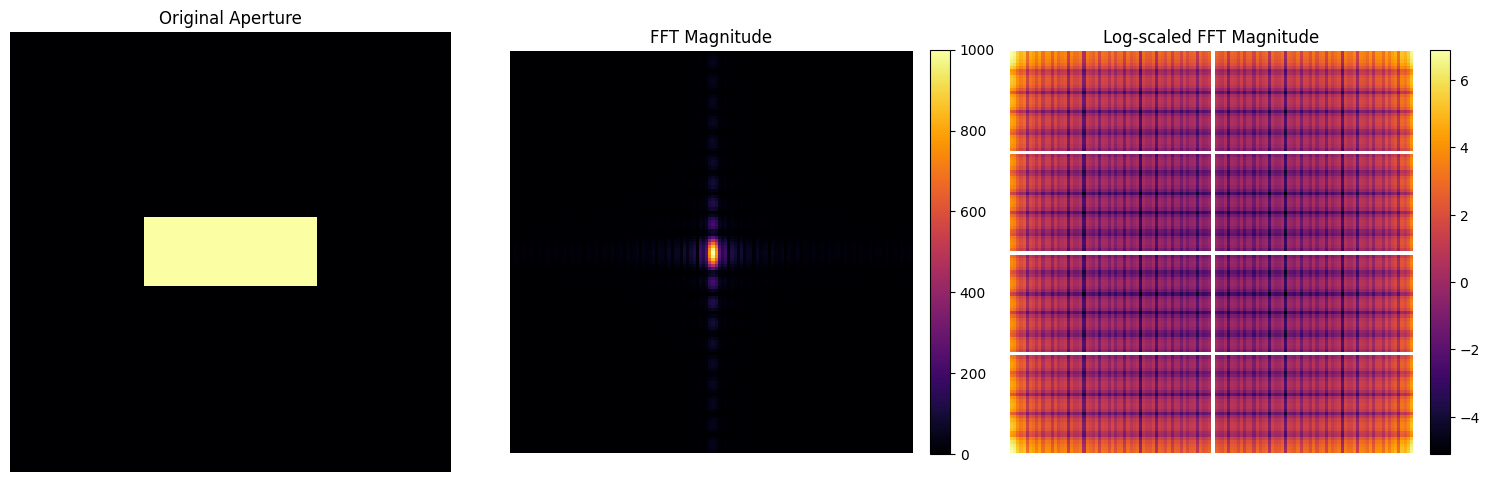

In [ ]:
#Display: 50x20 Rectangle

aperture_size = (50, 20)
grid_size = 128
aperture = generate_rectangle(aperture_size, grid_size)
fft_aperture = compute_fft(aperture)
shifted_fft_aperture = np.fft.fftshift(fft_aperture)
plot_results(aperture, fft_aperture, shifted_fft_aperture)

<ipython-input-34-634c349fb7c6>:34: RuntimeWarning: divide by zero encountered in log
  im2 = axes[2].imshow(np.log(np.abs(log_fft_magnitude)), cmap='inferno')


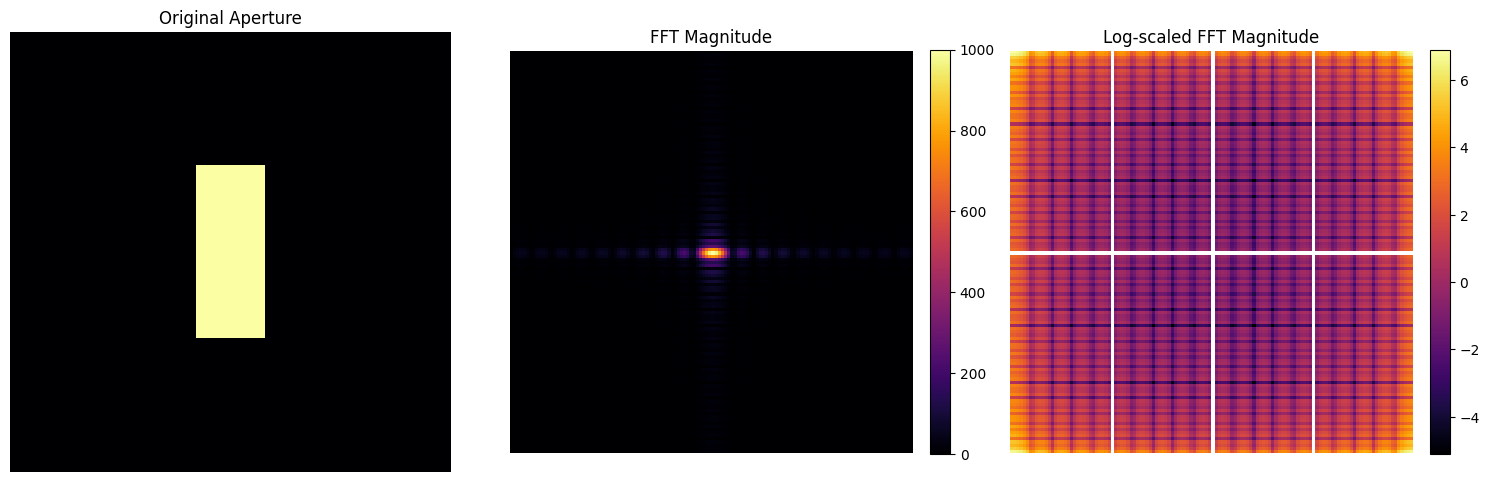

In [ ]:
#Display: 20x50 Rectangle
aperture_size = (20, 50)
grid_size = 128
aperture = generate_rectangle(aperture_size, grid_size)
fft_aperture = compute_fft(aperture)
shifted_fft_aperture = np.fft.fftshift(fft_aperture)
plot_results(aperture, fft_aperture, shifted_fft_aperture)


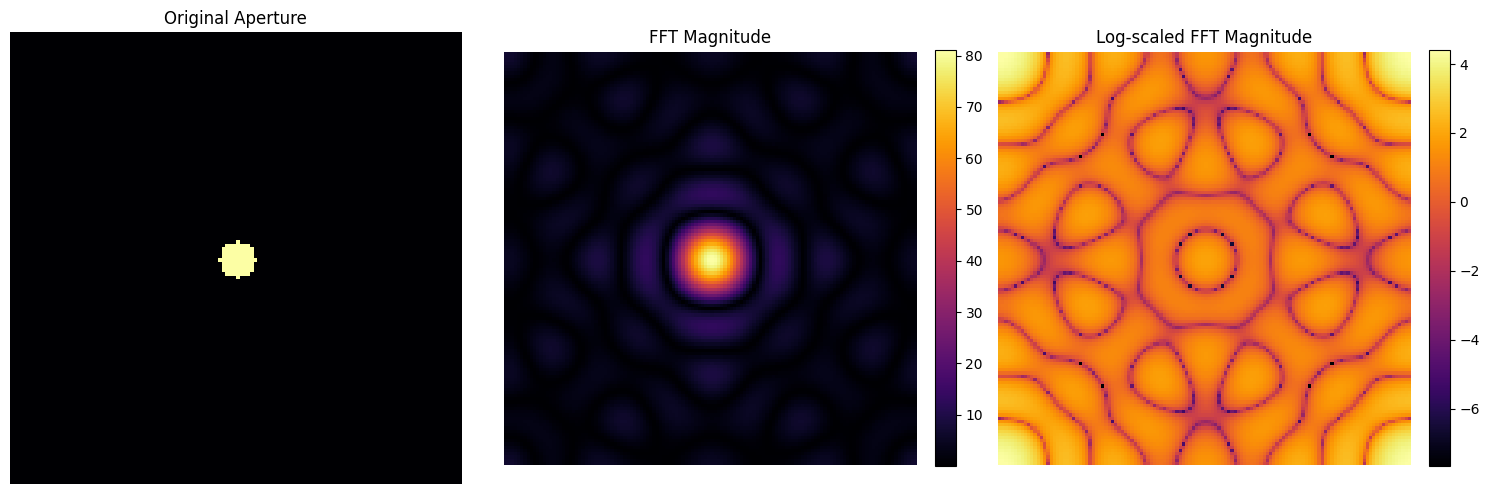

In [ ]:
#Display: 5 radius circle
aperture_radius = 5
grid_size = 128
aperture = generate_circle(aperture_radius, grid_size)
fft_aperture = compute_fft(aperture)
shifted_fft_aperture = np.fft.fftshift(fft_aperture)
plot_results(aperture, fft_aperture, shifted_fft_aperture)

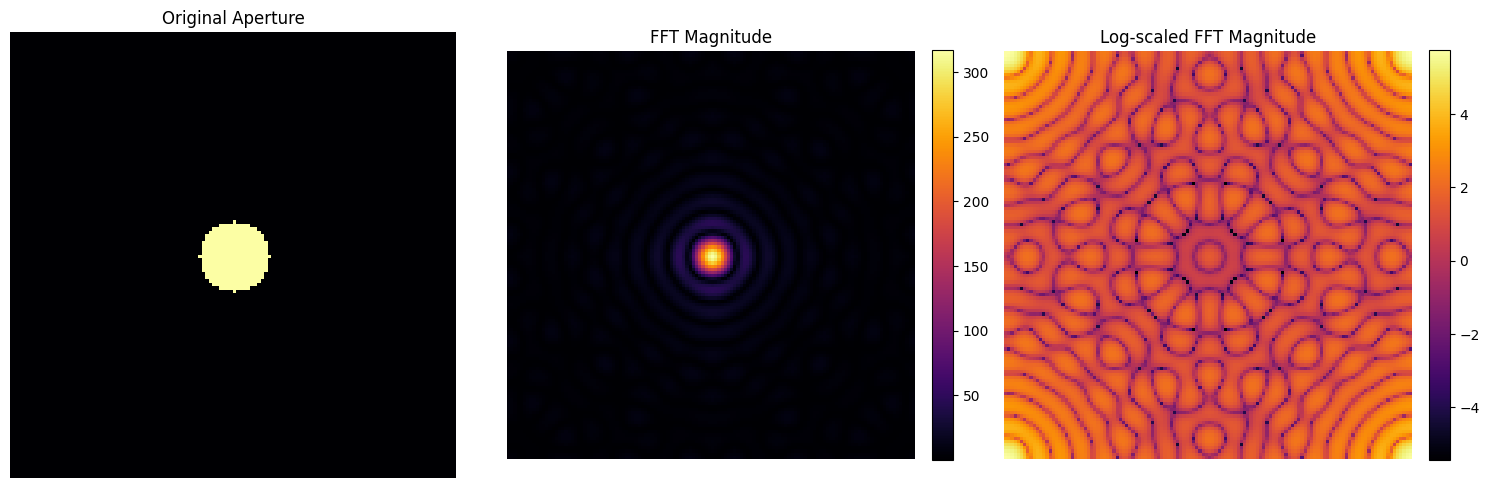

In [ ]:
#Display: 10 radius circle
aperture_radius = 10
grid_size = 128
aperture = generate_circle(aperture_radius, grid_size)
fft_aperture = compute_fft(aperture)
shifted_fft_aperture = np.fft.fftshift(fft_aperture)
plot_results(aperture, fft_aperture, shifted_fft_aperture)

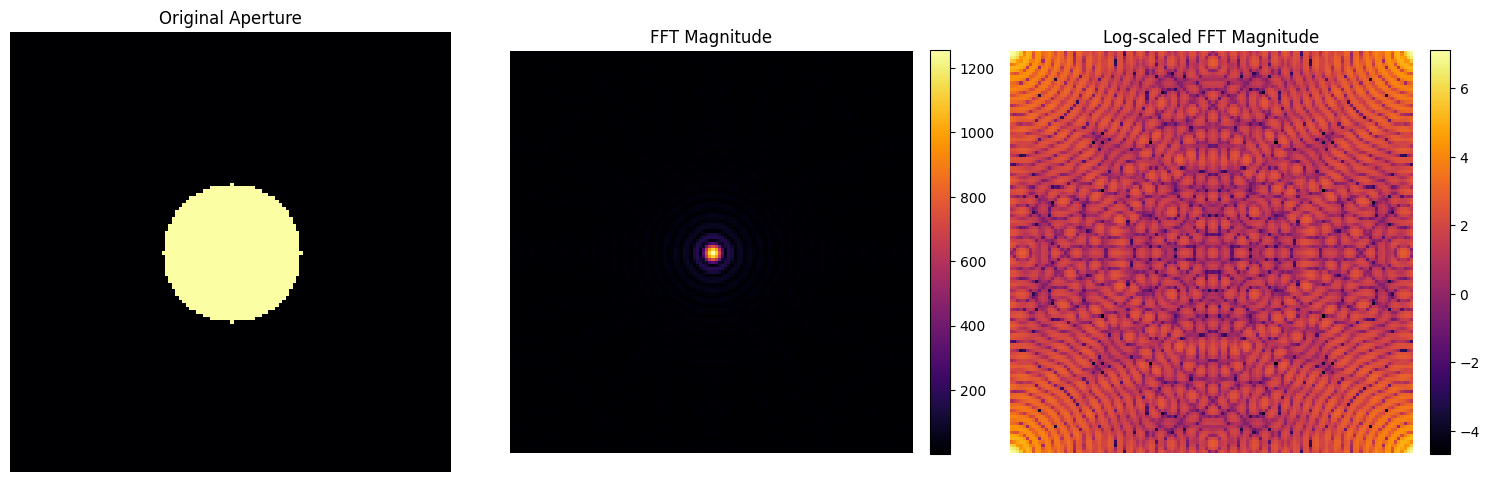

In [ ]:
#Display: 20 radius circle
aperture_radius = 20
grid_size = 128
aperture = generate_circle(aperture_radius, grid_size)
fft_aperture = compute_fft(aperture)
shifted_fft_aperture = np.fft.fftshift(fft_aperture)
plot_results(aperture, fft_aperture, shifted_fft_aperture)

#### PART 2 - Convolution *(20 points)*

Now that we've shown that FT acts as if an imaging system, suppose we have an image and convolve it with a circular aperture with different radii. Assuming that the circular aperture is a camera lens, we want to show how the reconstruction of the original image can be limited by the properties of the camera lens (or any imaging device) such as aperture size.

Take the astronaut image from skimage and convolve it with circular apertures of radii: 8, 32, and 64 pixels.

To do this, you can perform the ff. steps:

- **Compute Fourier Transform of Image:**
  - Use `fft2` to compute the 2D Fourier Transform of the input image.
  
- **Compute Fourier Transform of Aperture:**
  - Use `fftshift` to shift the zero-frequency component to the center.

- **Perform Element-wise Multiplication in Frequency Domain:**
  - Multiply the Fourier Transform of the image and the shifted aperture element-wise in the frequency domain.

- **Compute Inverse Fourier Transform:**
  - Use `ifft2` to compute the 2D Inverse Fourier Transform of the product from the previous step.

- **Visualization (Plotting):**
  - Create a figure with three subplots to visualize the original image, the aperture, and the convolution result.

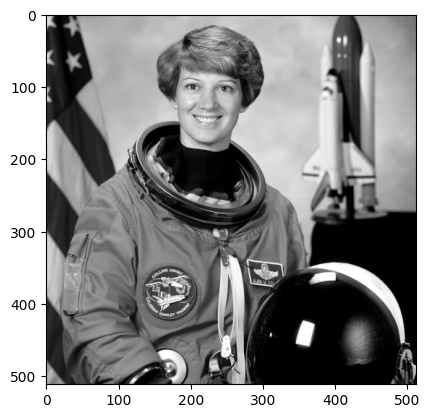

In [ ]:
plt.imshow(color.rgb2gray(data.astronaut()), cmap = "gray")

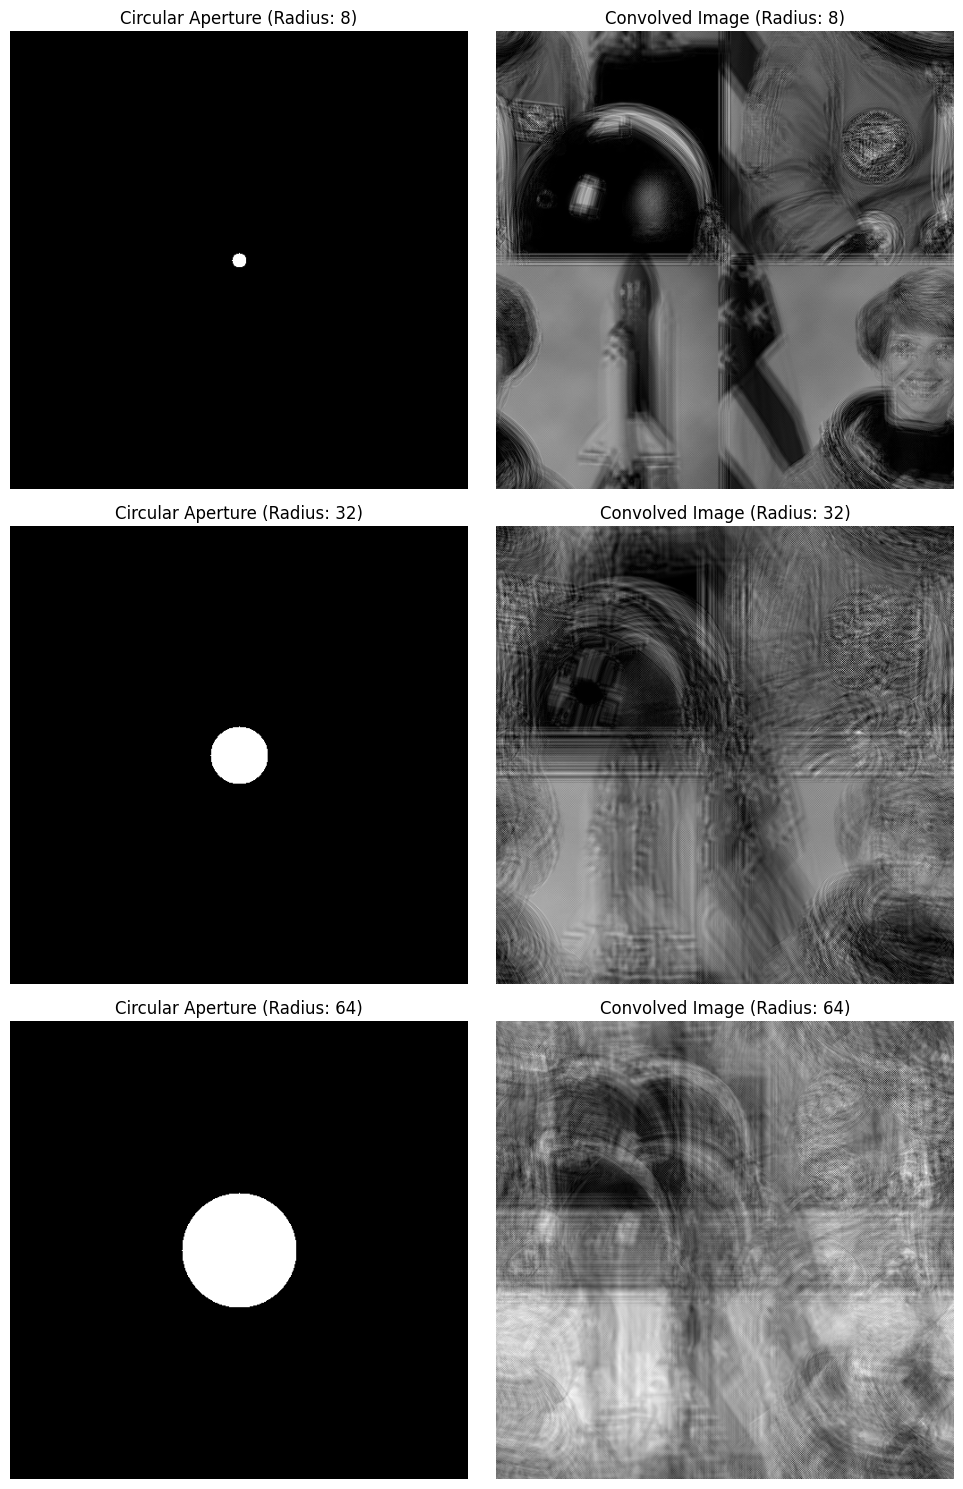

In [ ]:
#astronaut image
image = color.rgb2gray(data.astronaut())

#aperture parameters
radii = [8, 32, 64]
image_shape = image.shape[:2]


fig, axes = plt.subplots(3, 2, figsize=(10, 15))
#loop each radius
for i, radius in enumerate(radii):
    #circular aperture
    y, x = np.ogrid[-radius:radius, -radius:radius]
    circular_aperture = x**2 + y**2 <= radius**2

    #padding
    pad_width = (
        (image_shape[0] - circular_aperture.shape[0]) // 2,
        (image_shape[1] - circular_aperture.shape[1]) // 2
    )
    padded_aperture = np.pad(circular_aperture, pad_width, mode='constant')

    # Plot circular aperture
    axes[i, 0].imshow(padded_aperture, cmap='gray')
    axes[i, 0].set_title(f"Circular Aperture (Radius: {radius})")
    axes[i, 0].axis('off')

    image_ft = fft2(image)
    #shift to center
    aperture_ft = fftshift(fft2(padded_aperture))

    # Perform Element-wise Multiplication in Frequency Domain
    convolved_ft = image_ft * aperture_ft

    # Compute Inverse Fourier Transform
    convolved_image = np.abs(ifft2(convolved_ft))

    # Plot convolved image
    axes[i, 1].imshow(convolved_image, cmap='gray')
    axes[i, 1].set_title(f"Convolved Image (Radius: {radius})")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

#### PART 4 - Application: Canvas Weave Modeling and Removal *(30 points)*

Suppose we want to investigate the brush strokes of a painter. However, the texture of the canvas obscures our view of the brushstrokes. Let’s use FFT to remove the canvas weave.

Perform the ff. steps:

1. Open the image AP157_moduleB_canvas_weave_image.jpg (also in the Datasets folder; the image is from a painting by Dr. Vincent Daria.) and convert into a grayscale image. To enhance the detection of repeating patterns we first subtract the mean grayscale from the image. This will remove the DC bias of intensity images.

2. Take the FT of the mean-subtracted image and take note of the symmetric peaks. These are the sinusoids that make up the canvas weave image, similar to the rotation property of sinusoids we did earlier.

3. Manually create a filter mask in the FT space to remove the canvas weave patterns. This is a matrix which is the same size as the image. The filter is all 1’s but are zero at the locations of the sinusoidal peaks. FFT shift this filter and multiply this to the complex FT of the Red, Green and Blue channels of the original image (not mean subtracted). The filter essentially “erases” the peaks. Take the inverse FT of the filtered FT and overlay the filtered R,G,B images. Did the canvas weave vanish enough that the paint and brushstrokes remain?

4. Invert the filter mask (0's become 1's and vice versa) and take the inverse Fourier transform. Observe the generated modulus image. Is it close to the appearance of the canvas weave?

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
file_path = "/content/drive/My Drive/AP157/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


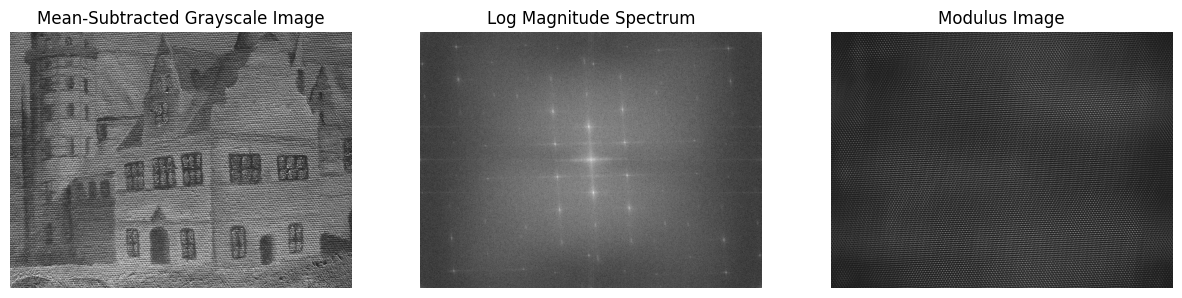

In [ ]:
#Load the image and greyscale
image = io.imread("/content/drive/MyDrive/AP157/AP157_moduleB2_canvas_weave_image.jpg")
gray_image = color.rgb2gray(image)

#subtract mean grayscale value
mean_subtracted_image = gray_image - np.mean(gray_image)

#FT of mean-subtracted image
ft_image = fft2(mean_subtracted_image)

#identify symmetric peaks in the FT
magnitude_spectrum = np.abs(fftshift(ft_image))
peaks_threshold = 0.1 * np.max(magnitude_spectrum)
peaks_mask = magnitude_spectrum > peaks_threshold

#manual filter to mask symmetric peaks
filter_mask = np.ones_like(ft_image)
filter_mask[peaks_mask] = 0

#apply the filter mask to the FT of the original RGB image
filtered_ft_image = np.zeros_like(image, dtype=np.complex128)
for i in range(image.shape[2]):  # Process each color channel separately
    channel_ft = fft2(image[:, :, i])
    filtered_channel_ft = channel_ft * fftshift(filter_mask)
    filtered_ft_image[:, :, i] = ifft2(filtered_channel_ft)

#invert the filter mask and apply it to the FT
inverted_filter_mask = 1 - filter_mask
modulus_image_ft = fftshift(ft_image * inverted_filter_mask)
modulus_image = np.abs(ifft2(modulus_image_ft))

# plot
fig, axes = plt.subplots(1, 3, figsize=(15, 10))
axes[0].imshow(mean_subtracted_image, cmap='gray')
axes[0].set_title('Mean-Subtracted Grayscale Image')
axes[0].axis('off')
axes[1].imshow(np.log(magnitude_spectrum + 1), cmap='gray')
axes[1].set_title('Log Magnitude Spectrum')
axes[1].axis('off')
axes[2].imshow(modulus_image, cmap='gray')
axes[2].set_title('Modulus Image')
axes[2].axis('off')
plt.show()

Discussion: The symmetric peaks are all the bright spots around the center spot found in the log magnitude spectrum image. Masking out the symmetric peaks filters out the pattern of the canvas weaves. This allows for an image without the pattern. The inverse can be done so that only the pattern can be outputted.


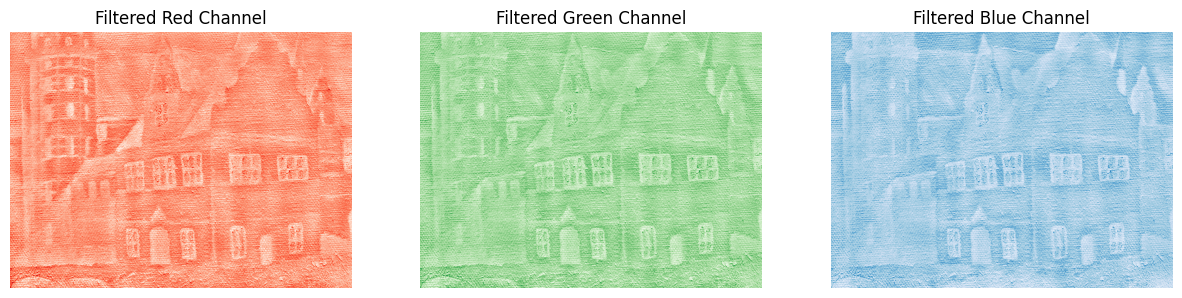

In [ ]:
# Step 8: Apply the filter mask to the Fourier Transform of the original RGB image
filtered_rgb_image = np.zeros_like(image, dtype=np.float64)
for i in range(image.shape[2]):  # Process each color channel separately
    channel_ft = fft2(image[:, :, i])
    filtered_channel_ft = channel_ft * fftshift(filter_mask)
    filtered_rgb_image[:, :, i] = np.abs(ifft2(filtered_channel_ft))

# Plot the filtered RGB images
fig, axes = plt.subplots(1, 3, figsize=(15, 10))
axes[0].imshow(filtered_rgb_image[:, :, 0], cmap='Reds')
axes[0].set_title('Filtered Red Channel')
axes[0].axis('off')
axes[1].imshow(filtered_rgb_image[:, :, 1], cmap='Greens')
axes[1].set_title('Filtered Green Channel')
axes[1].axis('off')
axes[2].imshow(filtered_rgb_image[:, :, 2], cmap='Blues')
axes[2].set_title('Filtered Blue Channel')
axes[2].axis('off')
plt.show()

Discussion: Above is the image seperated by their rgb values, combining them will recreate the painting but with the canvas weave filtered out.

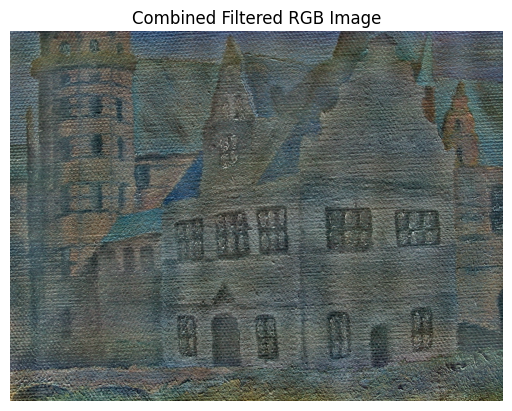

In [ ]:
# Normalize each channel of the filtered RGB images
filtered_rgb_image_normalized = filtered_rgb_image / np.max(filtered_rgb_image)

# Combine the filtered RGB images into one RGB image
filtered_combined_image = np.stack((filtered_rgb_image_normalized[:, :, 0],
                                    filtered_rgb_image_normalized[:, :, 1],
                                    filtered_rgb_image_normalized[:, :, 2]), axis=-1)

# Plot the combined RGB image
plt.imshow(filtered_combined_image)
plt.title('Combined Filtered RGB Image')
plt.axis('off')
plt.show()

Discussion: The image has less canvas weaving, but theres still noticeable horizontal strokes. The colors also more muted compared to the original.